In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
import plotly.plotly as py
import cufflinks as cf

In [2]:
psr1 = pd.read_csv('PadmaAwards - PadmaShri2000-09.csv')
psr2 = pd.read_csv('PadmaAwards - PadmaShri2010-161.csv')

In [3]:
psr1.columns.tolist()

['Year', 'Name', 'Field', 'State', 'Country']

In [4]:
psr1.Year.unique()

array(['2000', 'Year', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', 'Year 2009', '2009', '1990', '1991', '1992', '1998',
       '1999', '1981', '1982', '1983', '1984', '1986', '1987', '1988',
       '1989', '1970', '1971', '1972', '1973', '1974', '1975', '1976',
       '1977'], dtype=object)

In [5]:
psr2.columns.tolist()

['Name', 'Field', 'State', 'Country', 'Year']

In [6]:
psr = pd.concat([psr1,psr2])
psr.sort(['Year'], ascending=True,inplace=True)

# Create variable with TRUE if stark is the attacker
inv_valid = psr['Name'] != "Name"
psr = psr[inv_valid]
psr['Year'] = psr['Year'].convert_objects(convert_numeric=True)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning:

convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.



In [7]:
fields ={
    'Arts':'Arts',
    'Literature & Education':'Lit_Ed',
    'Medicine':'Medicine',
    'Social Work':'Social-Work',
    'Science & Engineering':'Science-Engg',
    'Civil Service':'Civil-Service',
    'Sports':'Sports',
    'Art':'Arts',
    'Literature and Education':'Lit_Ed',
    'Trade & Industry':'Industry',
    'Public Affairs':'Public-Affairs',
    'Public Service':'Public-Affairs',
    'Science and Engineering':'Science-Engg',
    'Trade and Industry':'Industry',
    'Others':'Others',
    'Social work':'Social-Work',
    'Journalism':'Journalism',
    'Art-Cinema':'Arts',
    'Medicine - Neurology':'Medicine',
    'Art - Theatre':'Arts',
    'Commentary and Broadcasting':'Journalism',
    'WildLife Conservation':'Social-Work',
    'Civil Services':'Civil-Service',
    'Public Affairs-Legal Affairs':'Public-Affairs',
    'Environment Protection':'Social-Work',
    'Archaeology':'Science-Engg',
    'Research on Himalayan Glaciers':'Science-Engg',
    'Technology Solutions':'Science-Engg',
    'Social Works':'Others',
    'Librarianship':'Others',
    'Great Islamic Scholar':'Others',
    'Yoga & Education':'Others',
    'Fashion Designing':'Others',
    'Other':'Others'
}


def standardize_fields(field):
    if field in fields:
        return fields[field]
    if "Medicine" in field:
        return fields['Medicine']
    if "Literature" in field:
        return fields['Literature & Education']
    if "Art" in field:
        return fields['Arts']
    if "Sports" in field:
        return fields['Sports']    
    if "Science" in field:
        return fields['Science & Engineering']  
    if "Others" in field:
        return fields['Others']       
    else:
        return field
psr["Std_Field"]=psr.Field.apply(lambda x : standardize_fields(x))

In [8]:
len(psr.Std_Field.unique())

11

In [9]:
psr.Field.unique().tolist()

['Public Affairs',
 'Civil Service',
 'Literature & Education',
 'Medicine',
 'Science & Engineering',
 'Social Work',
 'Arts',
 'Librarianship',
 'Sports',
 'Trade & Industry',
 'Science and Engineering',
 'Trade and Industry',
 'Literature and Education',
 'Art',
 'Public Service',
 'Environment Protection',
 'Literature and Education-Sanskrit',
 'Sports-Mountaineering',
 'Medicine-Cardio-Thoracic Surgery',
 'Medicine - Obstetrics and Gynaecology',
 'Medicine-Gastroenterology',
 'Medicine-Endocrinology',
 'Medicine-Orthopaedic',
 'Medicine-Cardiology',
 'Medicine-Padeatrics',
 'Medicine-Neurosurgery',
 'Sports-Discus Throw',
 'Social work',
 'Public Affairs-Legal Affairs',
 'Others-Handicrafts promotion',
 'Others-Archeology',
 'Others-Heritage Conservation',
 'Others-Nursing',
 'Sports-Shooting',
 'Sports-Wrestling',
 'Art-Chhau Dance',
 'Art-Folk Music',
 'Art-Traditional Music of Manipur (Pena)',
 'Art-Puppetry',
 'Art-Dance-Mohiniattam',
 'Art-Chenda Melam-Drum concert',
 'Art-Ca

In [10]:
psr.Std_Field.unique().tolist()

['Public-Affairs',
 'Civil-Service',
 'Lit_Ed',
 'Medicine',
 'Science-Engg',
 'Social-Work',
 'Arts',
 'Others',
 'Sports',
 'Industry',
 'Journalism']

In [11]:
psr.Std_Field.value_counts()

Arts              643
Lit_Ed            512
Medicine          392
Science-Engg      308
Social-Work       306
Civil-Service     222
Sports            179
Industry           92
Public-Affairs     56
Others             46
Journalism          7
Name: Std_Field, dtype: int64

In [12]:
series = psr.Std_Field.value_counts()
series.iplot(kind='bar',yTitle='Total Number of Awards in the category',title='Number of Padma Shri Awards',filename='padma/totalpadmashri')

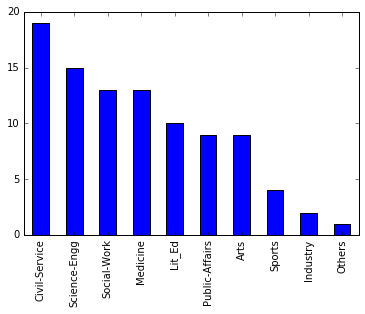

In [13]:
psr_50s = psr[(psr['Year']>1950) &(psr['Year']<1960)]
psr_50s.Std_Field.value_counts().plot(kind='bar')

In [14]:
import plotly.plotly as py
import plotly.graph_objs as go
arts = psr[psr.Std_Field=='Arts']
arts_byyear_cnt = arts.groupby(['Year'])['Country'].count()
trace1 = go.Scatter(
    x=arts_byyear_cnt.index,
    y=arts_byyear_cnt.values
)

layout = go.Layout(             # all "layout" attributes: /python/reference/#layout
    title="Arts Over the Years",     # more about "layout's" "title": /python/reference/#layout-title
    xaxis=dict(                 # all "layout's" "xaxis" attributes: /python/reference/#layout-xaxis
        title="time"            # more about "layout's" "xaxis's" "title": /python/reference/#layout-xaxis-title
    ))
data=[trace1]
fig = go.Figure(data=data, layout=layout)
fig['layout']['yaxis'].update(title='Number of PadmaShri Awardees for Arts')
fig['layout']['xaxis'].update(title='Year')
py.iplot(fig, filename='padma/artsbyyear')


In [15]:
import plotly.plotly as py
import plotly.graph_objs as go
meds = psr[psr.Std_Field=='Medicine']
meds_byyear_cnt = meds.groupby(['Year'])['Country'].count()
trace1 = go.Scatter(
    x=meds_byyear_cnt.index,
    y=meds_byyear_cnt.values
)

layout = go.Layout(             # all "layout" attributes: /python/reference/#layout
    title="Medicine Over the Years",     # more about "layout's" "title": /python/reference/#layout-title
    xaxis=dict(                 # all "layout's" "xaxis" attributes: /python/reference/#layout-xaxis
        title="time"            # more about "layout's" "xaxis's" "title": /python/reference/#layout-xaxis-title
    ))
data=[trace1]
fig = go.Figure(data=data, layout=layout)
fig['layout']['yaxis'].update(title='Number of PadmaShri Awardees for Arts')
fig['layout']['xaxis'].update(title='Year')
py.iplot(fig, filename='padma/medbyyear')


In [28]:
import plotly.plotly as py
import plotly.graph_objs as go
meds=psr.Std_Field=='Medicine'
arts=psr.Std_Field =='Arts'
lit= psr.Std_Field=='Lit_Ed'
sci= psr.Std_Field=='Science_Engg'
ctags = ['Medicine','Arts','Lit_Ed','Science_Engg']
cats = psr[psr.Std_Field.map(lambda x : x in ctags)]
byyear_sum = cats.groupby(['Year','Std_Field'])['Country'].count()
byyear_sum
#byyear_sum.iplot(kind='scatter',yTitle='Number of Awardees',title='Number of Padma Shri Awards Over the Years',filename='padma/totalpadmashribyyearpercategory')
byyear_sumunstacked = byyear_sum.unstack()
byyear_sumunstacked.fillna(0).iplot(kind='scatter',yTitle='Number of Awardees',title='PadmaShri Awards over the years(for selected categories)',filename='satish/padmatotalbycat')



In [17]:
import plotly.plotly as py
import plotly.graph_objs as go
byyear_cnt = psr.groupby(['Year'])['Country'].count()
trace1 = go.Scatter(
    x=byyear_cnt.index,
    y=byyear_cnt.values
)
data=[trace1]

layout = go.Layout(
    showlegend=False,
    annotations=[
        dict(
            x=2014,
            y=100,
            xref='x',
            yref='y',
            text='Election Year',
            showarrow=True,
            arrowhead=4,
            ax=0,
            ay=-40
        ),
        dict(
            x=2009,
            y=93,
            xref='x',
            yref='y',
            text='Election Year',
            showarrow=True,
            arrowhead=4,
            ax=0,
            ay=-40
        ),
        dict(
            x=2004,
            y=74,
            xref='x',
            yref='y',
            text='Election Year',
            showarrow=True,
            arrowhead=4,
            ax=0,
            ay=-40
        ),
        dict(
            x=1999,
            y=34,
            xref='x',
            yref='y',
            text='Election Year',
            showarrow=True,
            arrowhead=4,
            ax=0,
            ay=-40
        ),
        dict(
            x=1998,
            y=31,
            xref='x',
            yref='y',
            text='Election Year',
            showarrow=True,
            arrowhead=4,
            ax=0,
            ay=-40
        ),
        dict(
            x=1991,
            y=83,
            xref='x',
            yref='y',
            text='Election Year',
            showarrow=True,
            arrowhead=4,
            ax=0,
            ay=-40
        ),
        dict(
            x=1989,
            y=27,
            xref='x',
            yref='y',
            text='Election Year',
            showarrow=True,
            arrowhead=4,
            ax=0,
            ay=-40
        ),
        dict(
            x=1984,
            y=55,
            xref='x',
            yref='y',
            text='Election Year',
            showarrow=True,
            arrowhead=4,
            ax=0,
            ay=-40
        ),
        dict(
            x=1977,
            y=72,
            xref='x',
            yref='y',
            text='Election Year',
            showarrow=True,
            arrowhead=4,
            ax=0,
            ay=-40
        ),
        dict(
            x=1971,
            y=84,
            xref='x',
            yref='y',
            text='Election Year',
            showarrow=True,
            arrowhead=4,
            ax=0,
            ay=-40
        ),
        dict(
            x=1967,
            y=41,
            xref='x',
            yref='y',
            text='Election Year',
            showarrow=True,
            arrowhead=4,
            ax=0,
            ay=-40
        )
        
        
    ]
)
fig = go.Figure(data=data, layout=layout)
fig['layout'].update(title='Number of Padmashri awardees over the years')
fig['layout']['yaxis'].update(title='Number of PadmaShri - Awardees')
fig['layout']['xaxis'].update(title='Year')
py.iplot(fig, filename='padma/totalpadmashribyyear')

#byyear_cnt.iplot(kind='scatter',yTitle='Number of Awardees',title='Number of Padma Shri Awards Over the Years',filename='padma/totalpadmashribyyear')

In [18]:
byyear_sum = psr.groupby(['Year','Std_Field'])['Country'].count()
byyear_sum
#byyear_sum.iplot(kind='scatter',yTitle='Number of Awardees',title='Number of Padma Shri Awards Over the Years',filename='padma/totalpadmashribyyearpercategory')
byyear_sumunstacked = byyear_sum.unstack()
byyear_sumunstacked.fillna(0).iplot(kind='scatter',yTitle='Number of Awardees',title='PadmaShri Awards over the years by category',filename='satish/padmatotalbycategory')


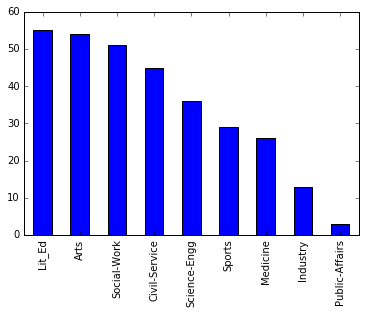

In [19]:
psr_60s = psr[(psr['Year']>=1960) &(psr['Year']<1970)]
psr_60s.Std_Field.value_counts().plot(kind='bar')

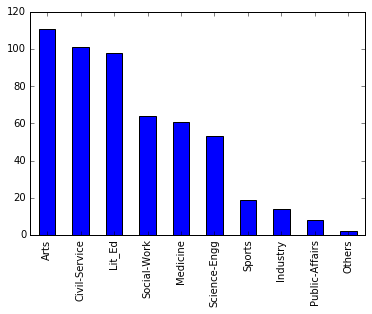

In [20]:
psr_70s = psr[(psr['Year']>=1970) &(psr['Year']<1980)]
psr_70s.Std_Field.value_counts().plot(kind='bar')

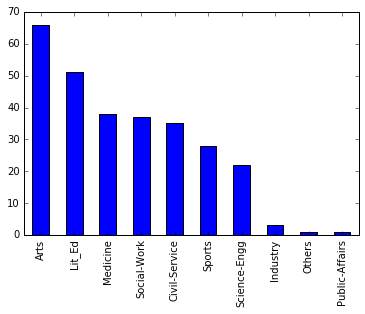

In [21]:
psr_80s = psr[(psr['Year']>=1980) &(psr['Year']<1990)]
psr_80s.Std_Field.value_counts().plot(kind='bar')

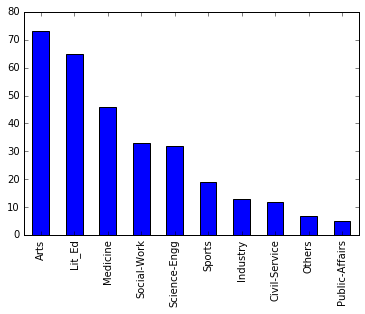

In [22]:
psr_90s = psr[(psr['Year']>=1990) &(psr['Year']<2000)]
psr_90s.Std_Field.value_counts().plot(kind='bar')

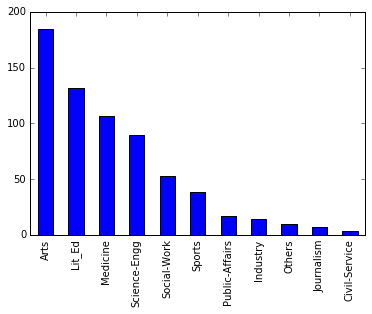

In [23]:
psr_00s = psr[(psr['Year']>=2000) &(psr['Year']<2010)]
psr_00s.Std_Field.value_counts().plot(kind='bar')

In [24]:
psr_10s = psr[(psr['Year']>=2010) &(psr['Year']<2020)]
psr_10s.Std_Field.value_counts()#.plot(kind='bar')

Arts              145
Medicine          101
Lit_Ed            101
Science-Engg       60
Social-Work        55
Sports             41
Industry           33
Others             25
Public-Affairs     13
Civil-Service       6
Name: Std_Field, dtype: int64

In [25]:
psr_10s.Std_Field.value_counts()['Others']

   ({'50s':psr_50s.Std_Field.value_counts()[field]},
    {'60s':psr_60s.Std_Field.value_counts()[field]},
    {'70s':psr_70s.Std_Field.value_counts()[field]},
    {'80s':psr_80s.Std_Field.value_counts()[field]},
    {'90s':psr_90s.Std_Field.value_counts()[field]},
    {'00s':psr_00s.Std_Field.value_counts()[field]},
    {'2010s':psr_10s.Std_Field.value_counts()[field]}) 
    
    for field in fields

IndentationError: unexpected indent (<ipython-input-25-e303134aad20>, line 3)

In [ ]:
x = psr_60s.Std_Field.value_counts()
print x
#x.loc["Others"]
print "Lit_Ed" in x.index.tolist()
print x.get_value("Lit_Ed")
print get_val_in_Seris(x,"Others")

In [ ]:
fields = psr.Std_Field.unique().tolist()
d = [
   ({field :[{'50s':get_val_in_Seris(psr_50s.Std_Field.value_counts(),field)},
    {'60s':get_val_in_Seris(psr_60s.Std_Field.value_counts(),field)},
    {'70s':get_val_in_Seris(psr_70s.Std_Field.value_counts(),field)},
    {'80s':get_val_in_Seris(psr_80s.Std_Field.value_counts(),field)},
    {'90s':get_val_in_Seris(psr_90s.Std_Field.value_counts(),field)},
    {'00s':get_val_in_Seris(psr_00s.Std_Field.value_counts(),field)},
    {'2010s':get_val_in_Seris(psr_10s.Std_Field.value_counts(),field)}]})
    
    for field in fields
] 

d    

In [ ]:
dl=[]
for a,b,c,d,e,f,g in d :
    dl.append(a)
    dl.append(b)
    dl.append(c)
    dl.append(d)
    dl.append(e)
    dl.append(f)
    dl.append(g)
    
dl
    


In [ ]:
psrdf = pd.DataFrame(d).transpose()
psrdf

In [ ]:
def get_val_in_Seris(s, f):
    if f in s.index.tolist():
        return s[f]
    else:
        return 0
    
    

In [ ]:
pb1 = pd.read_csv('../PadmaBhushan/PadmaAwards - PadmaBhushan2010-16.csv')
pb2 =pd.read_csv('../PadmaBhushan/PadmaAwards - PadmaBhushan1970.csv')



In [ ]:
pb12= pb2.drop(pb2.columns[3],axis=1)
pb11= pb1.drop(pb2.columns[3],axis=1)


In [ ]:
series = psr.Std_Field.value_counts()
series

In [ ]:
psr.Std_Field.value_counts()["Arts"]